# Question Suggestion Feature

### Import Dependencies

In [403]:
import numpy as np
import tensorflow as tf
import pandas as pd

### Preproccessing

In [404]:
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

In [405]:
# Load the dataset
df = pd.read_csv('../dataset/data.csv')
df.head()

,Question,Category
0,Bagaimana cara memilih reksadana dengan biaya ...,Reksadana
1,Apa itu reksadana terbuka dan bagaimana cara k...,Reksadana
2,Bagaimana cara keluar dari investasi reksadana?,Reksadana
3,Apa saja faktor yang mempengaruhi nilai aset b...,Reksadana
4,Apa itu reksadana offshore dan bagaimana cara ...,Reksadana


In [406]:
# Separate questions and labels
questions = df['Question'].tolist()
labels = df['Category'].tolist()

print(f'questions: {questions[:5]}')
print(f'labels: {labels[:5]}')

questions: ['Bagaimana cara memilih reksadana dengan biaya rendah?', 'Apa itu reksadana terbuka dan bagaimana cara kerjanya?', 'Bagaimana cara keluar dari investasi reksadana?', 'Apa saja faktor yang mempengaruhi nilai aset bersih reksadana?', 'Apa itu reksadana offshore dan bagaimana cara berinvestasi di dalamnya?']
labels: ['Reksadana', 'Reksadana', 'Reksadana', 'Reksadana', 'Reksadana']


In [407]:
# Convert categories to numerical labels
label_dict = {label: idx for idx, label in enumerate(set(labels))}
numerical_labels = [label_dict[label] for label in labels]

print(f'label_dict: {label_dict}')
print(f'numerical_labels: {numerical_labels[:5]}')

label_dict: {'Cryptocurrency': 0, 'Pajak': 1, 'Obligasi': 2, 'Reksadana': 3, 'Saham': 4, 'Manajemen keuangan pribadi': 5, 'Makro ekonomi': 6, 'Emas': 7, 'Asuransi': 8}
numerical_labels: [3, 3, 3, 3, 3]


In [408]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(questions)
sequences = tokenizer.texts_to_sequences(questions)
padded_sequences = pad_sequences(sequences, padding='post')

In [409]:
print(tokenizer)
print(tokenizer.word_index)
print(sequences[:5])
print(padded_sequences[:5])

{'bagaimana': 1, 'cara': 2, 'apa': 3, 'dan': 4, 'itu': 5, 'dalam': 6, 'saja': 7, 'reksadana': 8, 'yang': 9, 'obligasi': 10, 'emas': 11, 'saham': 12, 'dengan': 13, 'berinvestasi': 14, 'pajak': 15, 'untuk': 16, 'asuransi': 17, 'investasi': 18, 'cryptocurrency': 19, 'memilih': 20, 'kerjanya': 21, 'di': 22, 'dimaksud': 23, 'memahami': 24, 'menggunakan': 25, 'dari': 26, 'menghitung': 27, 'keuntungan': 28, 'trading': 29, 'faktor': 30, 'mempengaruhi': 31, 'dalamnya': 32, 'memanfaatkan': 33, 'analisis': 34, 'terhadap': 35, 'keuangan': 36, 'mengelola': 37, 'perbedaan': 38, 'antara': 39, 'jenis': 40, 'risiko': 41, 'risikonya': 42, 'perdagangan': 43, 'melakukan': 44, 'menggunakannya': 45, 'harga': 46, 'pasar': 47, 'menghindari': 48, 'pengaruhnya': 49, 'rendah': 50, 'nilai': 51, 'penyertaan': 52, 'keuntungannya': 53, 'sesuai': 54, 'leverage': 55, 'perusahaan': 56, 'terdaftar': 57, 'sertifikat': 58, 'perhiasan': 59, 'aman': 60, 'kelebihan': 61, 'digital': 62, 'membeli': 63, 'platform': 64, 'secara'

In [410]:
# Convert numerical labels to a numpy array
numerical_labels = np.array(numerical_labels)
print(f'numerical_labels: {numerical_labels[:5]}')

numerical_labels: [3 3 3 3 3]


In [411]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, numerical_labels, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')

print(f'X_train: {X_train[:5]}')
print(f'X_val: {X_val[:5]}')
print(f'y_train: {y_train[:5]}')
print(f'y_val: {y_val[:5]}')

X_train: (101, 11)
X_val: (26, 11)
y_train: (101,)
y_val: (26,)
X_train: [[  1   2  77 191  17  75   0   0   0   0   0]
 [  3   5 192   6  17   0   0   0   0   0   0]
 [  3   9  23  13 108 109 110 111   0   0   0]
 [  1   2 144 145  19   9 146   0   0   0   0]
 [  3   5  58  11   4   1   2  45   0   0   0]]
X_val: [[  3   9  23  13  12  57   4 130  57   0   0]
 [  3   5 265 266 267 268 269   0   0   0   0]
 [  1   2  27  15  84 217   0   0   0   0   0]
 [  3   7  71  71   6  67  72 172   0   0   0]
 [  1   2  44  29  19  65  60   0   0   0   0]]
y_train: [8 8 2 0 7]
y_val: [4 4 1 5 0]


### Model

In [412]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional # type: ignore

In [413]:
num_classes = len(set(labels))
print(f'Number of unique categories: {num_classes}')

Number of unique categories: 9


In [414]:
# Define the model
model = tf.keras.Sequential([
    Embedding(input_dim=10000, output_dim=64),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [415]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [446]:
# Train the model
history = model.fit(X_train, y_train, epochs=21, validation_data=(X_val, y_val))

Epoch 1/21


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 4.0104e-04 - val_accuracy: 0.6923 - val_loss: 2.3571
Epoch 2/21
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 3.9239e-04 - val_accuracy: 0.6923 - val_loss: 2.3528
Epoch 3/21
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 1.0000 - loss: 3.7752e-04 - val_accuracy: 0.6923 - val_loss: 2.3563
Epoch 4/21
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 3.5429e-04 - val_accuracy: 0.6923 - val_loss: 2.3661
Epoch 5/21
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 3.7601e-04 - val_accuracy: 0.6923 - val_loss: 2.3773
Epoch 6/21
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 3.5838e-04 - val_accuracy: 0.6923 - val_loss: 2.3829
Epoch 7/21
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 3.6620e-04 - val_accuracy: 0.6923 - val_loss: 2.3830
Epoch 8/21
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 3.5100e-04 - val_accuracy: 0.69

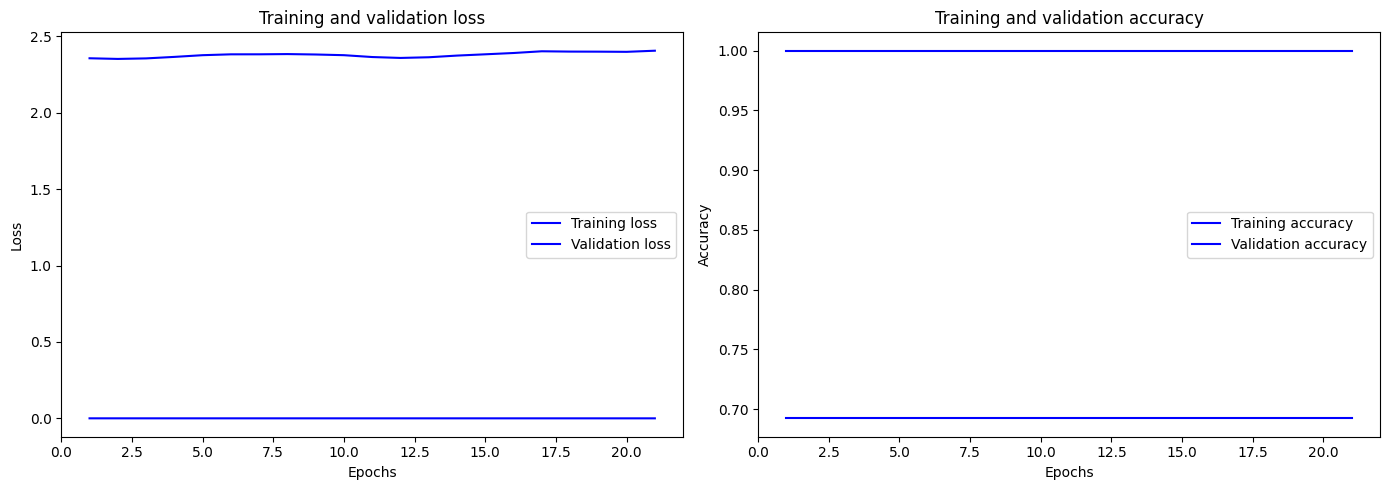

In [447]:
import matplotlib.pyplot as plt

# Function to plot the training history
def plot_training_history(history):
    # Extract the history data
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Plot loss and validation loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

### Usage

In [445]:
# Function to predict top questions
def suggest_questions(user_input, total_questions=4):
    sequence = tokenizer.texts_to_sequences([user_input])
    padded_sequence = pad_sequences(sequence, maxlen=padded_sequences.shape[1], padding='post')
    predictions = model.predict(padded_sequence)
    labels = list(label_dict.keys())
    
    # Get top n categories with their probabilities
    top_categories_prediction = np.argsort(predictions[0])[-1:][::-1]
    top_categories = [(labels[idx], predictions[0][idx]) for idx in top_categories_prediction]
    
    # Print top categories with their probabilities
    print("Top category and with the probability:")
    for category, prob in top_categories:
        print(f'{category}: {prob:.4f}')
    
    # Filter questions from the dataset based on top categories
    suggested_questions = []
    for category, _ in top_categories:
        category_questions = df[df['Category'] == category]['Question'].tolist()
        suggested_questions.extend(category_questions)
    
    # You can choose to return a random selection of questions, limit the number, etc.
    return suggested_questions[:total_questions]

# Example usage
# user_input = "Bagaimana cara berinvestasi yang aman?"
# user_input = "Bagaimana cara memilih asuransi yang tepat?"
# user_input = "Bagaimana cara memilih saham yang baik?"
user_input = "Bagaimana cara membuat anggaran bulanan yang efektif?"
# user_input = "Apa itu cryptocurrency?"
# user_input = "Apa yang harus saya lakukan jika suku bunga naik?"
# user_input = "Bagaimana cara saya memilih reksadana?"
# user_input = "Bagaimana cara saya memilih reksadana yang baik?"

# user_input = "Apa yang dimaksud dengan premi dalam asuransi?"


suggested_questions = suggest_questions(user_input)
print("Suggested questions:")
for question in suggested_questions:
    print(question)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Top category and with the probability:
Cryptocurrency: 0.8997
Suggested questions:
Bagaimana cara memilih platform trading cryptocurrency?
Apa itu cryptocurrency staking dan bagaimana cara kerjanya?
Bagaimana cara mengenali proyek cryptocurrency yang menjanjikan?
Apa saja teknik dasar dalam analisis teknikal cryptocurrency?
